# preprocess

In [1]:
%cd ~/Desktop/RNA/raptcouple_test

data_dir = "example/data/Ishida2020"

/Users/sumishunsuke/Desktop/RNA/raptcouple_test


In [4]:
# 3,4,5,6 Round
fastq_files = !ls $data_dir/*.fastq
fastq_files

['example/data/Ishida2020/DRR201870.fastq',
 'example/data/Ishida2020/DRR201871.fastq',
 'example/data/Ishida2020/DRR201872.fastq',
 'example/data/Ishida2020/DRR201873.fastq']

In [ ]:
from src.util_seqfile import fastq2fasta

for fastq_file in fastq_files:
    fastq2fasta(fastq_file)

In [8]:
!head -n 20 $data_dir/DRR201870.fa

>DRR201870.1 1 length=84
TAATACGACTCACTATAGGGAGAACTTCGACCAGAAGGCGCTTGCGTAGGTGCCTAAAAC
GACCATAATTGCCTACTTATGTGC
>DRR201870.2 2 length=62
TAATACGACTCACTATAGGGAGAACTTCGACCAGAAGGTTCCGCATCTACAGGGGGCGGA
AG
>DRR201870.3 3 length=100
TAATACGACTCACTATAGGGAGAACTTCGACCAGAAGTTGTTACTGAGCCGGGACTTTCG
GCCTCTGCGCACTCGCTTATGTGCGCATACATGGATCCTC
>DRR201870.4 4 length=69
TTAATACGACTCACTATAGGGAGAACTTCGACCAGAAGCAAGCCATAAACAAAGAGCCTG
TGACAGCAA
>DRR201870.5 5 length=100
TAATACGACTCACTATAGGGAGAACTTCGACCAGAAGAGCAAGAGAACTGGGAATGATAG
GTCGGCCTAAGACCAGCTATGTGCGCATACATGGATCCTC
>DRR201870.6 6 length=100
TAATACGACTCACTATAGGGAGAACTTCGACCAGAAGAGCGGGGCCTGTGTTCCGCTAAC
TTTCAGCTCGGGCTAATTATGTGCGCATACATGGATCCTC
>DRR201870.7 7 length=100
TAATACGACTCACTATAGGGAGAACTTCGACCAGAAGAGAACAGCGTCTGAGGACGGGCG


# config

fwd: TAATACGACTCACTATAGGGAGAACTTCGACCAGAAG  
rev: GAGGATCCATGTATGCGCACATA  
full: GGGAGAACTTCGACCAGAAG-40N-TATGTGCGCATACATGGATCCTC  

In [11]:
!cat $data_dir/config.yaml

N_random: 40
adapter_3: TATGTGCGCATACATGGATCCTC
adapter_5: TAATACGACTCACTATAGGGAGAACTTCGACCAGAAG
data_dir: ./example/data/Ishida2020
fasta_annotation:
  DRR201870.fa: Ishida2020-3R
  DRR201871.fa: Ishida2020-4R
  DRR201872.fa: Ishida2020-5R
  DRR201873.fa: Ishida2020-6R


In [12]:
# preprocess

!python scripts/merge_and_cutadapt_all_rounds.py  --config ./example/data/Ishida2020/config.yaml --merged_fasta ./example/data/Ishida2020/Ishida2020.count.ann.all_selex.fa


This is cutadapt 4.4 with Python 3.10.11
Command line parameters: --discard-untrimmed -g TAATACGACTCACTATAGGGAGAACTTCGACCAGAAG ./example/data/Ishida2020/DRR201870.fa -o ./example/data/Ishida2020/DRR201870.trim.tmp.fa
Processing single-end reads on 1 core ...
Finished in 0.875 s (5.971 µs/read; 10.05 M reads/minute).

=== Summary ===

Total reads processed:                 146,505
Reads with adapters:                   145,124 (99.1%)

== Read fate breakdown ==
Reads discarded as untrimmed:            1,381 (0.9%)
Reads written (passing filters):       145,124 (99.1%)

Total basepairs processed:    13,237,147 bp
Total written (filtered):      7,813,153 bp (59.0%)

=== Adapter 1 ===

Sequence: TAATACGACTCACTATAGGGAGAACTTCGACCAGAAG; Type: regular 5'; Length: 37; Trimmed: 145124 times

Minimum overlap: 3
No. of allowed errors:
1-9 bp: 0; 10-19 bp: 1; 20-29 bp: 2; 30-37 bp: 3

Overview of removed sequences
length	count	expect	max.err	error counts
29	7	0.0	2	6 1
30	1	0.0	3	0 0 1
31	3	0.0	3	2

# jackhmmer & DCA

In [16]:
!grep -A1 "Ishida2020-6R-1-" ./example/Ishida2020/data/Ishida2020.count.ann.all_selex.fa

>Ishida2020-6R-1-2626-55264.43
GTACTACGCCACAACGAACCCCGGCCTGTACCTTTCCGTA


In [18]:
target_id = "Ishida2020-6R-1-2626-55264.43"

!python ./scripts/run_jackhmmer.py --fasta ./example/Ishida2020/data/Ishida2020.count.ann.all_selex.fa --target {target_id} --save_dir ./example/Ishida2020/outputs/

target	: Ishida2020-6R-1-2626-55264.43
sequence: GTACTACGCCACAACGAACCCCGGCCTGTACCTTTCCGTA
Iteration=1 Hits=1461 Included=1461 Converged=False
Iteration=2 Hits=8021 Included=8021 Converged=False
Iteration=3 Hits=13950 Included=13950 Converged=False
Iteration=4 Hits=16736 Included=16736 Converged=False
Iteration=5 Hits=17670 Included=17670 Converged=False
Iteration=6 Hits=18120 Included=18120 Converged=False
Iteration=7 Hits=18155 Included=18155 Converged=False
Iteration=8 Hits=18255 Included=18255 Converged=False
Iteration=9 Hits=18278 Included=18278 Converged=False
Iteration=10 Hits=18261 Included=18261 Converged=False
MSA saved	: ./example/Ishida2020/outputs/Ishida2020-6R-1-2626-55264.43.msa


In [20]:
!head ./example/Ishida2020/outputs/Ishida2020-6R-1-2626-55264.43.msa
!tail ./example/Ishida2020/outputs/Ishida2020-6R-1-2626-55264.43.msa

>Ishida2020-3R-1-9-90.52/1-40
GUACUAC.G..CC...A.C.AA...CGAA.......CCCCGG..CC...U...GUA...CC..UUUCCGUA
>Ishida2020-4R-1-585-7400.19/1-40
GUACUAC.G..CC...A.C.AA...CGAA.......CCCCGG..CC...U...GUA...CC..UUUCCGUA
>Ishida2020-5R-1-2256-28946.09/1-40
GUACUAC.G..CC...A.C.AA...CGAA.......CCCCGG..CC...U...GUA...CC..UUUCCGUA
>Ishida2020-6R-1-2626-55264.43/1-40
GUACUAC.G..CC...A.C.AA...CGAA.......CCCCGG..CC...U...GUA...CC..UUUCCGUA
>Ishida2020-5R-4453-1-12.83/1-40
GUACUAC.G..CC...A.C.AA...CGAA.......CCCCGG..CC...U...GUA...CC..UUUCCGUA
>Ishida2020-5R-2722-2-25.66/14-41
...........CC...A.A.AA...CGA.........CCCAG..CA.......GUU...CC..UUUCCGU.
>Ishida2020-6R-2496-1-21.05/14-41
...........CC...A.A.AA...CGA.........CCCAG..CA.......GUU...CC..UUUCCGU.
>Ishida2020-5R-2032-3-38.49/14-41
...........CC...A.A.AA...CGA.........CCCAG..CA.......GUU...CC..UUUCCGU.
>Ishida2020-5R-4453-1-12.83/15-42
...........CC...A.A.AA...CGA.........CCCAG..CA.......GUU...CC..UUUCCGU.
>Ishida2020-4R-5347-1-12.65/20-41
.....AC.G..CA

# train potts model 

In [24]:
import subprocess 

msa_file = f"./example/Ishida2020/outputs/{target_id}.msa"

cmd = f"""python scripts/train_potts.py --input_fasta {msa_file}"""

res = subprocess.run(cmd, shell=True, capture_output=True)
print(res.stdout.decode())
print(res.stderr.decode())



Found focus Ishida2020-3R-1-9-90.52/1-40 as sequence 1
18271 valid sequences out of 18271 
71 sites out of 71
Effective number of samples: 2278.5	(95% identical neighborhood = 1.000 samples)
iter	time	cond	fx	-loglk	||h||	||e||
1	1.0	146.21	62314.7	62280.1	45.5	1.0
2	1.5	116.90	53255.2	52940.9	45.5	4.6
3	2.0	270.27	53011.0	52124.5	45.5	7.9
4	2.5	119.91	49808.7	48783.8	45.5	8.5
5	3.0	67.78	48927.0	47771.4	45.5	9.0
6	3.5	44.74	48556.5	47243.0	45.5	9.6
7	4.0	45.51	48040.9	46316.2	45.5	11.0
8	4.5	84.57	47726.7	45625.5	45.5	12.2
9	5.0	49.10	47340.0	45121.3	45.5	12.5
10	5.5	49.12	46734.2	44424.5	45.5	12.8
11	6.0	59.77	46310.3	44016.5	45.5	12.7
12	7.0	90.67	45972.7	43662.2	45.5	12.8
13	7.6	43.52	45494.4	43242.2	45.5	12.6
14	8.1	35.27	45192.6	42965.4	45.5	12.6
15	8.6	39.38	44903.6	42650.0	45.5	12.6
16	9.1	82.78	44785.3	42450.6	45.5	12.9
17	9.6	32.88	44533.4	42167.5	45.5	12.9
18	10.2	29.25	44384.9	41967.5	45.5	13.1
19	10.7	36.69	44196.3	41675.7	45.5	13.4
20	11.2	76.51	43957.3	41230.3	45.5	13.9

In [27]:
target_id

'Ishida2020-6R-1-2626-55264.43'

# visualize

(<Figure size 1000x1000 with 4 Axes>,
 array([<Axes: >, <Axes: >], dtype=object))

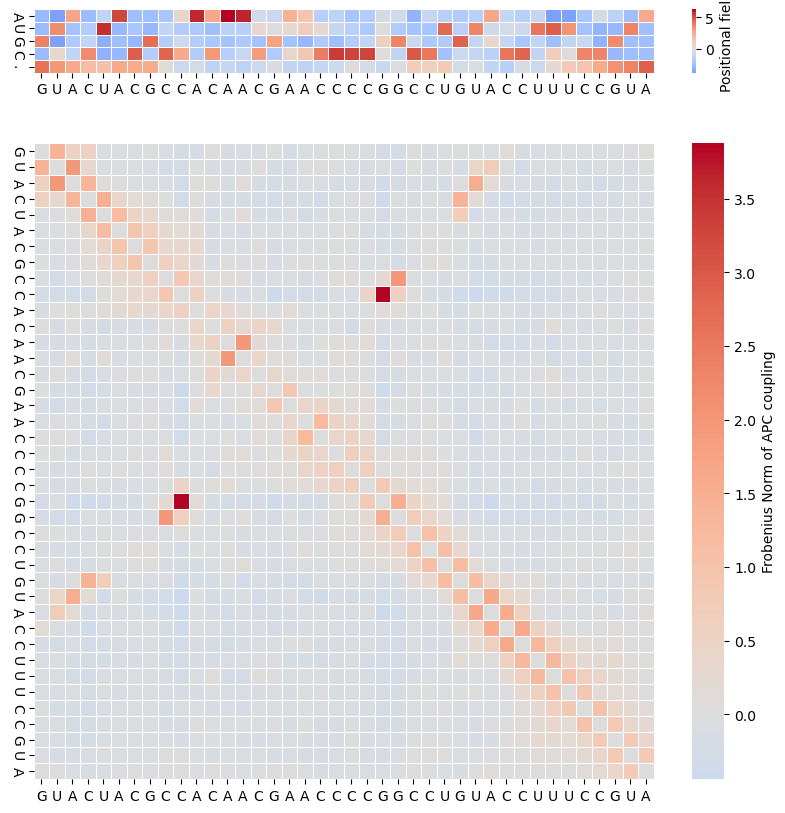

In [2]:
from src.visualize import plot_from_param_file

target_id = "Ishida2020-6R-1-2626-55264.43"

plot_from_param_file(
    f"./example/Ishida2020/outputs/{target_id}.model_params",
    use_gap = False,
    square = False
    )